In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from Ising import Lattice
from spec_heat import C

# Equilibrium plots

magnetisation is: [0.65234375]


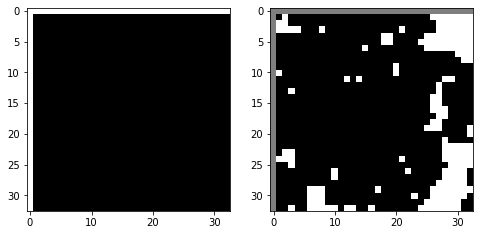

In [5]:
l = Lattice(N=32, d=2, free_bound=True)
#l.random()
fig, axs = plt.subplots(1, 2)
axs[0].imshow(l.lat[0], cmap='binary')
l.evolve(n=100, T=2, H=0)
axs[1].imshow(l.lat[0], cmap='binary')
print('magnetisation is: ' + str(l.magn()))
fig.set_size_inches(8, 4)

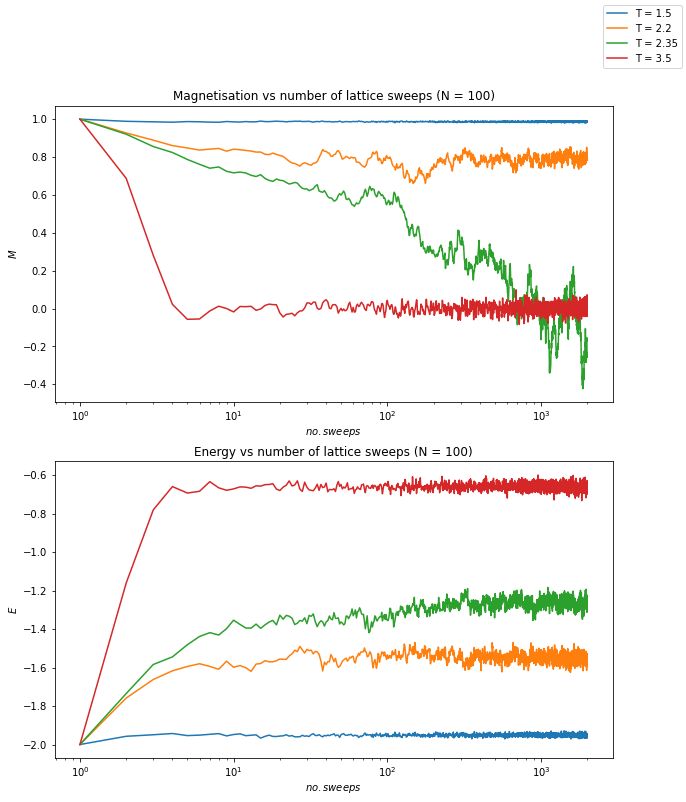

In [13]:
l = Lattice(100)
n = 2000
Ts = [1.5, 2.2, 2.35, 3.5]

fig, ax = plt.subplots(2)
for T in Ts:
    l.align()
    Es, Ms = l.stats_equ(n, T, H=0)
    ax[0].plot(range(1, n+1), Ms)
    ax[1].plot(range(1, n+1), Es)

ax[0].set_xscale('log'), ax[1].set_xscale('log')
ax[0].set_xlabel("$no. sweeps$"), ax[1].set_xlabel("$no. sweeps$")
ax[0].set_ylabel("$M$"), ax[1].set_ylabel("$E$")
ax[0].set_title("Magnetisation vs number of lattice sweeps (N = 100)"), ax[1].set_title("Energy vs number of lattice sweeps (N = 100)")
fig.legend(["T = " + str(T) for T in Ts], loc='upper right')
fig.set_size_inches(10, 12)


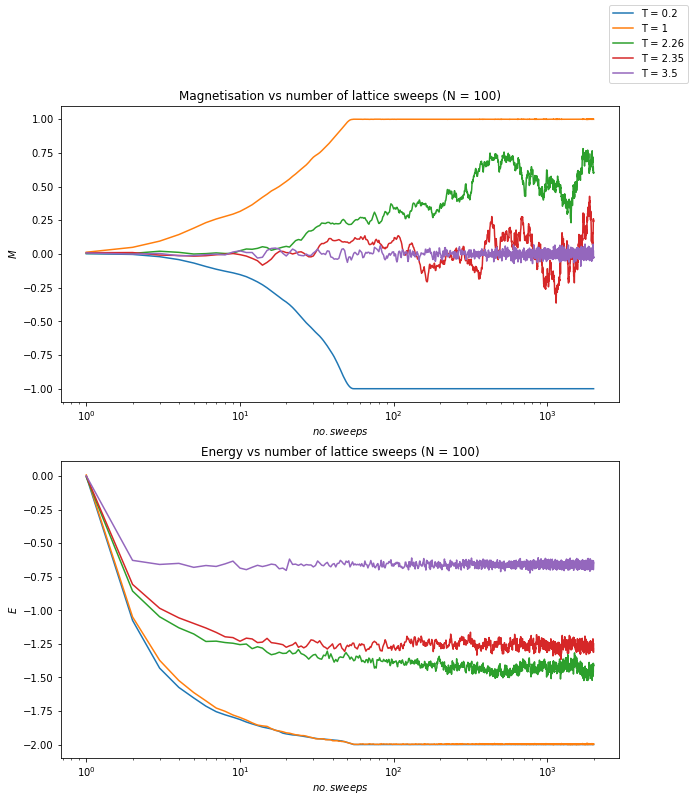

In [14]:
l = Lattice(100)
n = 2000
Ts = [0.2, 1, 2.26, 2.35, 3.5]

fig, ax = plt.subplots(2)
for T in Ts:
    l.random()
    Es, Ms = l.stats_equ(n, T, H=0)
    ax[0].plot(range(1, n+1), Ms)
    ax[1].plot(range(1, n+1), Es)

ax[0].set_xscale('log'), ax[1].set_xscale('log')
ax[0].set_xlabel("$no. sweeps$"), ax[1].set_xlabel("$no. sweeps$")
ax[0].set_ylabel("$M$"), ax[1].set_ylabel("$E$")
ax[0].set_title("Magnetisation vs number of lattice sweeps (N = 100)"), ax[1].set_title("Energy vs number of lattice sweeps (N = 100)")
fig.legend(["T = " + str(T) for T in Ts], loc='upper right')
fig.set_size_inches(10, 12)

# Decorrelation

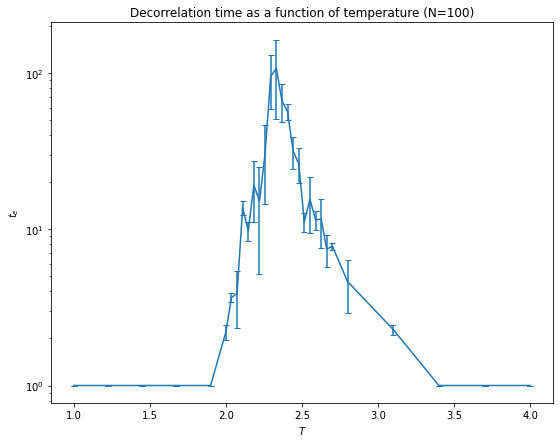

In [30]:
K = 3
n = 700
tau = n//7
T_steps = 20
Ns = [100]
Ts = np.concatenate((np.linspace(1, 1.9, 5), np.linspace(2.0, 2.7, T_steps), np.linspace(2.8, 4, 5)))

fig, ax = plt.subplots()
for N in Ns:
    ts, t_err = [], []
    l = Lattice(int(N), d=2, K=K)
    for T in Ts:
        t_stats= l.time_decorr(n, T, tau=tau, t0=200)
        ts.append(t_stats[0]), t_err.append(t_stats[1])
    ts, t_err = np.array(ts), np.array(t_err)
    ax.errorbar(Ts, ts, t_err, capsize=3)

ax.set_title("Decorrelation time as a function of temperature (N=100)")
ax.set_xlabel("$T$")
ax.set_ylabel("$t_{e}$")
ax.set_yscale('log')

fig.set_size_inches(9, 7)

# stats: $M, \chi, E, C$

1.3
1.55
1.8000000000000003
2.0500000000000003
2.1
2.1102564102564103
2.1205128205128205
2.1307692307692307
2.141025641025641
2.151282051282051
2.1615384615384614
2.171794871794872
2.1820512820512823
2.1923076923076925
2.2025641025641027
2.212820512820513
2.223076923076923
2.2333333333333334
2.2435897435897436
2.253846153846154
2.264102564102564
2.2743589743589743
2.2846153846153845
2.2948717948717947
2.3051282051282054
2.3153846153846156
2.325641025641026
2.335897435897436
2.3461538461538463
2.3564102564102565
2.3666666666666667
2.376923076923077
2.387179487179487
2.3974358974358974
2.4076923076923076
2.417948717948718
2.4282051282051285
2.4384615384615387
2.448717948717949
2.458974358974359
2.4692307692307693
2.4794871794871796
2.48974358974359
2.5
2.55
2.7666666666666666
2.9833333333333334
3.2


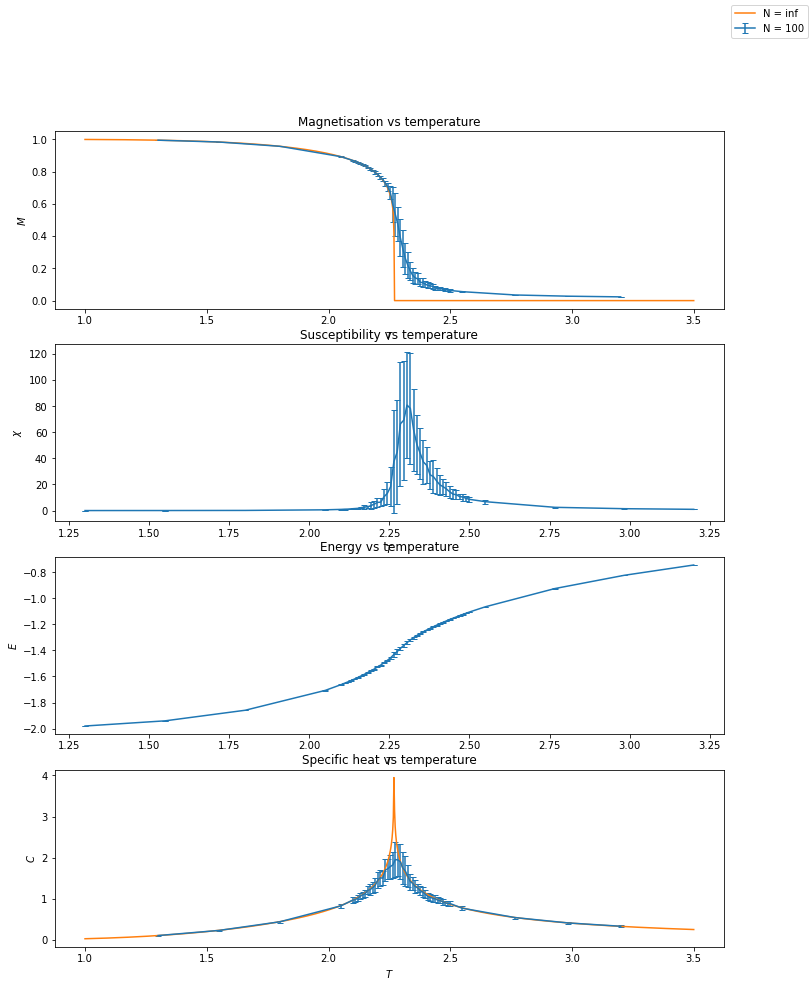

In [73]:
K = 50
n = 1000

Ns = [100]

T_l, T_h = 2.1, 2.5
T_steps = 40
Ts = np.concatenate((np.linspace(1.3, T_l-0.05, 4), np.linspace(T_l, T_h, T_steps), np.linspace(T_h+0.05, 3.2, 4)))

fig, ax = plt.subplots(4)

for N in Ns:
    stats, errs = [], []
    l = Lattice(int(N), d=2, K=K)
    for T in Ts:
        stat, err = l.stats(n, T, t0=300 if T == Ts[0] else 100)
        stats.append(stat), errs.append(err)
        print(T)
    stats, errs = np.array(stats).T, np.array(errs).T
    for i in range(len(stats)):
        ax[i].errorbar(Ts, stats[i], errs[i], capsize=3)

T_c = 2.26918
T_M = np.linspace(1, 3.5, 1000)
M_theo = np.abs(1 - np.sinh(2 * T_M**(-1))**(-4))**(1/8) * (T_M < T_c)
C_theo = [C(T) for T in T_M]

ax[0].plot(T_M, M_theo), ax[3].plot(T_M, C_theo)
ax[0].set_title("Magnetisation vs temperature"), ax[1].set_title("Susceptibility vs temperature"), ax[2].set_title("Energy vs temperature"), ax[3].set_title("Specific heat vs temperature")
ax[0].set_xlabel("$T$"), ax[1].set_xlabel("$T$"), ax[2].set_xlabel("$T$"), ax[3].set_xlabel("$T$")
ax[0].set_ylabel("$M$"), ax[1].set_ylabel("$\chi$"), ax[2].set_ylabel("$E$"), ax[3].set_ylabel("$C$")
fig.legend(['N = inf'] + ["N = " + str(int(N)) for N in Ns], loc='upper right')
fig.set_size_inches(12, 15)

np.savez('data/crit_data2.npz', stats=stats, errs=errs)

# Hysteresis

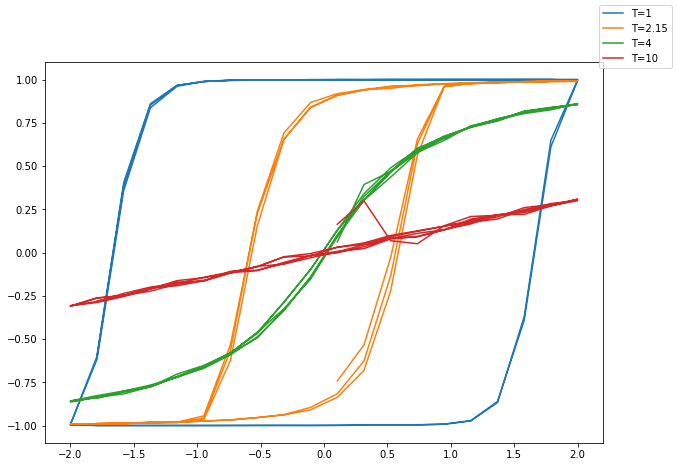

In [2]:
l = Lattice(128, 2)
Ts = [1, 2.15, 4, 10]
fig, ax = plt.subplots()
for T in Ts:
    Hs, magns = l.hysteresys(2, T, H_max=2, H_steps=20, cycles=3)
    ax.plot(Hs, magns)
fig.legend([f'{T=}' for T in Ts], loc='upper right')
fig.set_size_inches(10, 7)